In [1]:
# -*- coding: utf-8 -*-


"""
Created on Tue Oct 10 08:47:17 2017

@author: Philipe Leal
"""
try:
    import sys
except:
    print("Problemas na abertura do SYS")

try:
    import os
except:
    print("Problemas na abertura do OS")
try:
    import numpy as np
except:
    print("Problemas na abertura do numpy")
    
try:
    from osgeo import gdal, ogr, osr
except:
    sys.exit("Erro: a biblioteca GDAL não foi encontrada!")
    
try:
    
    from utils import *
except:
    print("Problemas na abertura de utils")
    
try:
    
    gdal.UseExceptions()
    ogr.UseExceptions()
    osr.UseExceptions()
    
except:
    print("Nao foi possivel usar excecoes pelo osgeo")

try:
    GDALDataset.ExecuteSQL()
except:
    print("Nao foi possível executar SQL pelo GDAL")

try:
       
    import pandas as pd
    print("Pandas aberto com sucesso")
    import geopandas as gpd
    print("GeoPandas aberto com sucesso")
    
except:
    print("Pandas e Geopandas nao foram abertos!")
    
import matplotlib.pyplot as plt
print("Matplotlib.Pyplot aberto com sucesso")
    

%matplotlib inline

Problemas na abertura de utils
Nao foi possível executar SQL pelo GDAL
Pandas aberto com sucesso
GeoPandas aberto com sucesso
Matplotlib.Pyplot aberto com sucesso


In [2]:
shp_focos_path = "C:/Doutorado/3_Trimestre/PDI_2/focos/Tocantins/Focos_setembro_Tocantins.shp"

try:
    print("Tentando abrir arquivo focos com geopandas...")
    focos = gpd.read_file(shp_focos_path)
    print("Geopandas importou o arquivo de focos de queimada")
    Biblioteca = "Geopandas"
    
except:
    driver = ogr.GetDriverByName('ESRI Shapefile')
    print("Driver bem definido")

    dataSource = driver.Open(shp_focos_path, 0) # 0 means read-only. 1 means writeable.

    print("dataSource aberto:\n {0}".format(dataSource))

    # Check to see if shapefile is found.

    if dataSource is None:
        print ('Could not open %s' % (shp_focos_path))
    else:
        print ('Opened %s' % (shp_focos_path))
        try:
            layer = dataSource.GetLayer()
            print("Layer aberto com sucesso!")
            try:
                featureCount = layer.GetFeatureCount()
                print("Feature Count carregado!\n")
                print ("Number of features in %s: %d" % (os.path.basename(shp_focos_path),featureCount))
                Biblioteca = "OSGEO"
            except:
                print("Nao foi possivel contar features!")
        except:
            print("Layer nao foi carregado!")


Tentando abrir arquivo focos com geopandas...
Geopandas importou o arquivo de focos de queimada


In [3]:
if Biblioteca == "OSGEO":
    
    layerDefinition = focos.GetLayerDefn()
    for i in range(layerDefinition.GetFieldCount()):
        fieldName =  layerDefinition.GetFieldDefn(i).GetName()
        fieldTypeCode = layerDefinition.GetFieldDefn(i).GetType()
        fieldType = layerDefinition.GetFieldDefn(i).GetFieldTypeName(fieldTypeCode)
        fieldWidth = layerDefinition.GetFieldDefn(i).GetWidth()
        GetPrecision = layerDefinition.GetFieldDefn(i).GetPrecision()

        print (fieldName + " - " + fieldType+ " " + str(fieldWidth) + " " + str(GetPrecision))

else:
    print(focos.dtypes)
    

id            float64
municipio      object
estado         object
regiao         object
pais           object
satelite       object
bioma          object
timestamp      object
satelite_r     object
rand          float64
geometry       object
dtype: object


In [4]:
# Convertendo timestamp em datetime format:

focos["timestamp"] = pd.to_datetime(focos["timestamp"]) # convertendo

print(focos.dtypes) # notar a mudanca do tipo de atributo timestamp


type(focos)

id                   float64
municipio             object
estado                object
regiao                object
pais                  object
satelite              object
bioma                 object
timestamp     datetime64[ns]
satelite_r            object
rand                 float64
geometry              object
dtype: object


geopandas.geodataframe.GeoDataFrame

In [5]:
# Importando Shapefile de Municipios:

municipios = gpd.read_file(r"C:\Doutorado\Unidades_Federativas_Shapefile\BR\BRMUE250GC_SIR.shp")



municipios.head(2)



,NM_MUNICIP,CD_GEOCMU,geometry
0,CAIUÁ,3509106,POLYGON ((-51.86001052999998 -21.5807199056459...
1,CASTILHO,3511003,POLYGON ((-51.41936432700003 -20.6810765586240...


In [6]:
# alterando nomenclatura das colunas do Geodataframe:

municipios.columns = ["nome", "cod_ibge", "geometry"]

municipios.head()



,nome,cod_ibge,geometry
0,CAIUÁ,3509106,POLYGON ((-51.86001052999998 -21.5807199056459...
1,CASTILHO,3511003,POLYGON ((-51.41936432700003 -20.6810765586240...
2,DRACENA,3514403,POLYGON ((-51.48515406800003 -21.4276462056422...
3,ESTRELA DO NORTE,3515301,POLYGON ((-51.57097467399996 -22.3988718766653...
4,EUCLIDES DA CUNHA PAULISTA,3515350,POLYGON ((-52.44569233499996 -22.6082794076701...


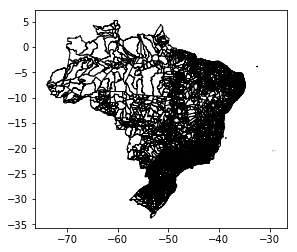

In [7]:
municipios.plot(color='white', edgecolor='black', figsize=(6, 4));

In [9]:
# Filtrando Municípios de Tocantins

municipios_Tocant = municipios[municipios["cod_ibge"].str[0:2] == "17"]

In [10]:

# Garantindo sistema de Referencia entre Shapfiles:
municipios.crs = {'init': 'epsg:4326'}
focos.crs = {'init': 'epsg:4326'}

# agrupando shapefiles por localizacao
Join_Tocant = gpd.sjoin(focos, municipios_Tocant, how="right", op='intersects')

# Visualizacao do agrupamento Espacial. Notar que sjoin realiza, na verdade, uma multiplicacao das feições, 
    # replicando o numero de poligonos finais conforme o numero de focos.

Join_Tocant.head(3)

,index_left,id,municipio,estado,regiao,pais,satelite,bioma,timestamp,satelite_r,rand,nome,cod_ibge,geometry
index_right,,,,,,,,,,,,,,
3174,0,49684932.0,SÃ­tio Novo Do Tocantins,Tocantins,N,Brazil,NPP_375,Cerrado,2016-02-12 17:05:45,f,0.578124,SÍTIO NOVO DO TOCANTINS,1720804,POLYGON ((-47.59340732900001 -5.67990354118602...
3174,1,49685028.0,SÃ­tio Novo Do Tocantins,Tocantins,N,Brazil,NPP_375,Cerrado,2016-07-17 04:00:00,f,0.820325,SÍTIO NOVO DO TOCANTINS,1720804,POLYGON ((-47.59340732900001 -5.67990354118602...
3174,2,49685038.0,SÃ­tio Novo Do Tocantins,Tocantins,N,Brazil,AQUA_M-T,Cerrado,2016-01-15 16:40:14,t,0.510514,SÍTIO NOVO DO TOCANTINS,1720804,POLYGON ((-47.59340732900001 -5.67990354118602...


# Uma vez com uma tabela com os polígonos replicados, é preciso somá-los espacialmente (agrupá-los):

## Para tanto, usar função groupby:

In [11]:
Join_Tocant_agrupado = Join_Tocant.groupby('nome').id.count()

print("Antes\n\n",Join_Tocant_agrupado.head(),"\n\n")

Join_Tocant_agrupado.name='nfocos'

Join_Tocant_agrupado.index.name = "Municipios"
Join_Tocant_agrupado.name = "Numero_Focos/Municipio_em_Setembro"
      
print("Depois: com correcao dos atributos pd.Series \n\n",Join_Tocant_agrupado.head())

Antes

 nome
ABREULÂNDIA             1654
AGUIARNÓPOLIS             85
ALIANÇA DO TOCANTINS     836
ALMAS                   4137
ALVORADA                 274
Name: id, dtype: int64 


Depois: com correcao dos atributos pd.Series 

 Municipios
ABREULÂNDIA             1654
AGUIARNÓPOLIS             85
ALIANÇA DO TOCANTINS     836
ALMAS                   4137
ALVORADA                 274
Name: Numero_Focos/Municipio_em_Setembro, dtype: int64


In [12]:
municipios_Tocant.head()

,nome,cod_ibge,geometry
index_right,,,
3047,ABREULÂNDIA,1700251,POLYGON ((-48.88649580000003 -9.77194564131597...
3048,AGUIARNÓPOLIS,1700301,POLYGON ((-47.43189905100002 -6.42546832321006...
3049,ALIANÇA DO TOCANTINS,1700350,POLYGON ((-48.54252495500002 -11.3833519943655...
3050,ALMAS,1700400,POLYGON ((-46.70340347199999 -11.1296492083578...
3051,ALVORADA,1700707,POLYGON ((-48.92153041399997 -12.2941030733930...


In [13]:
mun_toc_indexado_pelo_nome = municipios_Tocant.set_index('nome')

# notar como o indexador foi alterado e "index_right" para "nome"


mun_toc_indexado_pelo_nome.head()

,cod_ibge,geometry
nome,,
ABREULÂNDIA,1700251,POLYGON ((-48.88649580000003 -9.77194564131597...
AGUIARNÓPOLIS,1700301,POLYGON ((-47.43189905100002 -6.42546832321006...
ALIANÇA DO TOCANTINS,1700350,POLYGON ((-48.54252495500002 -11.3833519943655...
ALMAS,1700400,POLYGON ((-46.70340347199999 -11.1296492083578...
ALVORADA,1700707,POLYGON ((-48.92153041399997 -12.2941030733930...


In [14]:
toc_mun_focos = pd.concat([mun_toc_indexado_pelo_nome,Join_Tocant_agrupado],axis=1)

toc_mun_focos.head()

,cod_ibge,geometry,Numero_Focos/Municipio_em_Setembro
ABREULÂNDIA,1700251,POLYGON ((-48.88649580000003 -9.77194564131597...,1654
AGUIARNÓPOLIS,1700301,POLYGON ((-47.43189905100002 -6.42546832321006...,85
ALIANÇA DO TOCANTINS,1700350,POLYGON ((-48.54252495500002 -11.3833519943655...,836
ALMAS,1700400,POLYGON ((-46.70340347199999 -11.1296492083578...,4137
ALVORADA,1700707,POLYGON ((-48.92153041399997 -12.2941030733930...,274


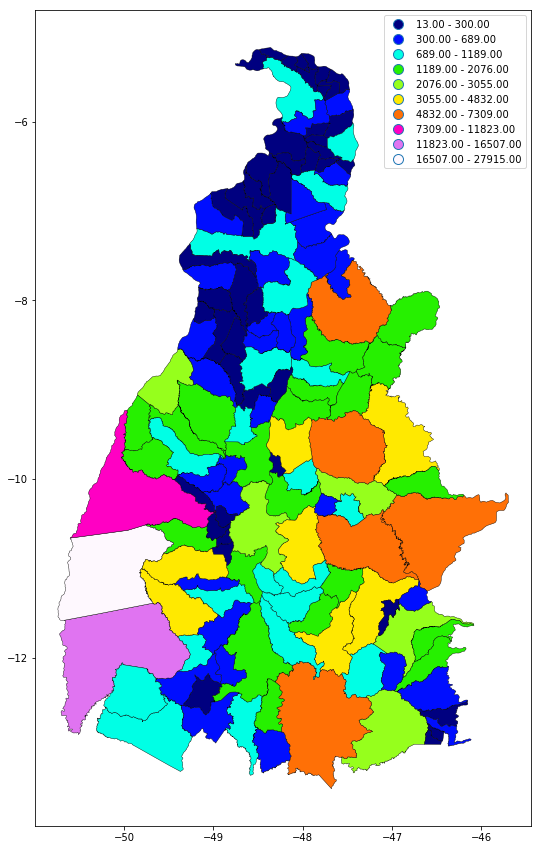

In [15]:
Fig_Focos_Tocantins_setembro_2016 = toc_mun_focos.plot(column='Numero_Focos/Municipio_em_Setembro', legend = True, cmap = "gist_ncar", scheme = 'Fisher_jenks', k = 10, edgecolor = 'black', linewidth = 0.4, markersize = 2, figsize = (15, 15))

Fig_Focos_Tocantins_setembro_2016.plot();

In [16]:
Fig_Focos_Tocantins_setembro_2016.figure.savefig(fname = 'C:/Users/Philipe Leal/Dropbox/Profissao/Python/Shapefile/Geopandas/figuras_Tocantins/', filename = "Focos_setembro.png", dpi=300, facecolor='w', edgecolor='w',
          orientation='portrait', papertype=None, format=None,
          transparent=False, bbox_inches=None, pad_inches=0.1,
          frameon=None)

In [ ]:
# Plotando gráfico join:

Plot_1 = Join_Tocant.plot(cmap='Paired', figsize=(14, 8), legend=True);

# Add title
Plot_1.set_title("N° de Focos em Setembro por Municipio de Tocantins");

# Add legend:

Plot_1.set_label(s = (2,2))

In [ ]:
# Plotando gráfico join:

Plot_1 = Join_Tocant_agrupado.plot(cmap='Paired', figsize=(14, 8), legend=True);

# Add title
Plot_1.set_title("N° de Focos em Setembro por Municipio de Tocantins");

# Add legend:

Plot_1.set_label(s = (2,2))